<a href="https://colab.research.google.com/github/hritiksth764/END-COURSE-SESSION-4.0-/blob/main/Session4_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
%matplotlib inline
import math
import matplotlib.pyplot as plt
from IPython import display
plt.style.use('seaborn-white')

In [2]:
file_1 = open('text.txt', 'r').read()

In [4]:
chars = list(set(file_1))
data_size, X_size = len(file_1), len(chars)
print("Corona Virus article has %d characters, %d unique characters" %(data_size, X_size))
char_to_idx = {ch:i for i,ch in enumerate(chars)}
idx_to_char = {i:ch for i,ch in enumerate(chars)}



Corona Virus article has 10223 characters, 75 unique characters


In [6]:
Hidden_Layer_size = 10 #size of the hidden layer
Time_steps = 10 # Number of time steps (length of the sequence) used for training
learning_rate = 1e-1 # Learning Rate
weight_sd = 0.1 #Standard deviation of weights for initialization
z_size = Hidden_Layer_size + X_size #Size of concatenation(H, X) vector



In [7]:
def sigmoid(x): # sigmoid function
  return (1. /(1 + np.exp(-x)))

def dsigmoid(y): # derivative of sigmoid function
  return (y * (1. - y))

def tanh(x): # tanh function
  return (np.tanh(x))

def dtanh(y): # derivative of tanh
  return (1. - y * y)

Quiz Question 1

What is the value of sigmoid(0) calculated from your code? (Answer up to 1 decimal point, e.g. 4.2 and NOT 4.29999999, no rounding off).
Quiz Question 2

What is the value of dsigmoid(sigmoid(0)) calculated from your code?? (Answer up to 2 decimal point, e.g. 4.29 and NOT 4.29999999, no rounding off).
Quiz Question 3

What is the value of tanh(dsigmoid(sigmoid(0))) calculated from your code?? (Answer up to 5 decimal point, e.g. 4.29999 and NOT 4.29999999, no rounding off).
Quiz Question 4

What is the value of dtanh(tanh(dsigmoid(sigmoid(0)))) calculated from your code?? (Answer up to 5 decimal point, e.g. 4.29999 and NOT 4.29999999, no rounding off)

In [8]:
print(float("{:.2f}".format(sigmoid(0))))

print(float("{:.2f}".format(dsigmoid(sigmoid(0)))))

print(float("{:.5f}".format(tanh(dsigmoid(sigmoid(0))))))

print(float("{:.5f}".format(dtanh(tanh(dsigmoid(sigmoid(0)))))))

0.5
0.25
0.24492
0.94001


In [9]:
class Param:
    def __init__(self, name, value):
      self.name = name
      self.v = value # parameter value
      self.d = np.zeros_like(value) # derivative
      self.m = np.zeros_like(value) # momentum for Adagrad


LSTM

You are making this network, please note f, i, c and o (also "v") in the image below: alt text

Please note that we are concatenating the old_hidden_vector and new_input.


In [10]:
size_a =  Hidden_Layer_size
size_b =  z_size 
size_c =  X_size

class Parameters:
    def __init__(self):
        self.W_f = Param('W_f', np.random.randn(size_a, size_b) * weight_sd + 0.5)
        self.b_f = Param('b_f', np.zeros((size_a, 1)))

        self.W_i = Param('W_i', np.random.randn(size_a, size_b) * weight_sd + 0.5)
        self.b_i = Param('b_i', np.zeros((size_a, 1)))

        self.W_C = Param('W_C', np.random.randn(size_a, size_b) * weight_sd)
        self.b_C = Param('b_C', np.zeros((size_a, 1)))

        self.W_o = Param('W_o', np.random.randn(size_a, size_b) * weight_sd + 0.5)
        self.b_o = Param('b_o', np.zeros((size_a, 1)))

        #For final layer to predict the next character
        self.W_v = Param('W_v', np.random.randn(X_size, size_a) * weight_sd)
        self.b_v = Param('b_v', np.zeros((size_c, 1)))
        
    def all(self):
        return [self.W_f, self.W_i, self.W_C, self.W_o, self.W_v,
               self.b_f, self.b_i, self.b_C, self.b_o, self.b_v]

parameters = Parameters()


In [11]:
def forward(x, h_prev, C_prev, p = parameters):
    assert x.shape == (X_size, 1)
    assert h_prev.shape == (Hidden_Layer_size, 1)
    assert C_prev.shape == (Hidden_Layer_size, 1)
    
    z = np.row_stack((h_prev, x))
    f = sigmoid(np.dot(p.W_f.v, z) + p.b_f.v)
    i = sigmoid(np.dot(p.W_i.v, z) + p.b_i.v)
    C_bar = tanh(np.dot(p.W_i.v, z) + p.b_C.v)

    C = f * C_prev + i * C_bar
    o = sigmoid(np.dot(p.W_o.v, z) + p.b_i.v)
    h = o * tanh(C)
    
    v = np.dot(p.W_v.v, h) + p.b_v.v
    y = np.exp(v) / np.sum(np.exp(v)) #softmax

    return z, f, i, C_bar, C, o, h, v, y



Quiz Question 5

What is the output of 'print(len(forward(np.zeros((X_size, 1)), np.zeros((Hidden_Layer_size, 1)), np.zeros((Hidden_Layer_size, 1)), parameters)))'?


In [12]:
print(len(forward(np.zeros((X_size, 1)),np.zeros((Hidden_Layer_size, 1)),np.zeros((Hidden_Layer_size, 1)),parameters)))

9



Quiz Question 6.

Assuming you have fixed the forward function, run this command: z, f, i, C_bar, C, o, h, v, y = forward(np.zeros((X_size, 1)), np.zeros((Hidden_Layer_size, 1)), np.zeros((Hidden_Layer_size, 1)))

Now, find these values:

    print(z.shape)
    print(np.sum(z))
    print(np.sum(f))

Copy and paste exact values you get in the logs into the quiz.


In [13]:
z, f, i, C_bar, C, o, h, v, y = forward(
    np.zeros((X_size, 1)), 
    np.zeros((Hidden_Layer_size, 1)), 
    np.zeros((Hidden_Layer_size, 1))
)


In [14]:
print(z.shape)
print(np.sum(z))
print(np.sum(f))

(85, 1)
0.0
5.0


In [15]:
def backward(target, dh_next, dC_next, C_prev,
             z, f, i, C_bar, C, o, h, v, y,
             p = parameters):
    
    assert z.shape == (X_size + Hidden_Layer_size, 1)
    assert v.shape == (X_size, 1)
    assert y.shape == (X_size, 1)
    
    for param in [dh_next, dC_next, C_prev, f, i, C_bar, C, o, h]:
        assert param.shape == (Hidden_Layer_size, 1)
        
    dv = np.copy(y)
    dv[target] -= 1

    p.W_v.d += np.dot(dv, h.T)
    p.b_v.d += dv

    dh = np.dot(p.W_v.v.T, dv)        
    dh += dh_next
    do = dh * tanh(C)
    do = dsigmoid(o) * do
    p.W_o.d += np.dot(do, z.T)
    p.b_o.d += do

    dC = np.copy(dC_next)
    dC += dh * o * dtanh(tanh(C))
    dC_bar = dC * i
    dC_bar = dtanh(C_bar) * dC_bar
    p.W_C.d += np.dot(dC_bar, z.T)
    p.b_C.d += dC_bar

    di = dC * C_bar
    di = dsigmoid(i) * di
    p.W_i.d += np.dot(di, z.T)
    p.b_i.d += di

    df = dC * C_prev
    df = dsigmoid(f) * df
    p.W_f.d += np.dot(df, z.T)
    p.b_f.d += df

    dz = (np.dot(p.W_f.v.T, df)
         + np.dot(p.W_i.v.T, di)
         + np.dot(p.W_C.v.T, dC_bar)
         + np.dot(p.W_o.v.T, do))
    dh_prev = dz[:Hidden_Layer_size, :]
    dC_prev = f * dC
    
    return dh_prev, dC_prev


In [16]:
def clear_gradients(params = parameters):
    for p in params.all():
        p.d.fill(0)



In [17]:
def clip_gradients(params = parameters):
    for p in params.all():
        np.clip(p.d, -1, 1, out=p.d)


In [18]:
def forward_backward(inputs, targets, h_prev, C_prev):
    global paramters
    
    # To store the values for each time step
    x_s, z_s, f_s, i_s,  = {}, {}, {}, {}
    C_bar_s, C_s, o_s, h_s = {}, {}, {}, {}
    v_s, y_s =  {}, {}
    
    # Values at t - 1
    h_s[-1] = np.copy(h_prev)
    C_s[-1] = np.copy(C_prev)
    
    loss = 0
    # Loop through time steps
    assert len(inputs) == Time_steps
    for t in range(len(inputs)):
        x_s[t] = np.zeros((X_size, 1))
        x_s[t][inputs[t]] = 1 # Input character
        
        (z_s[t], f_s[t], i_s[t],
        C_bar_s[t], C_s[t], o_s[t], h_s[t],
        v_s[t], y_s[t]) = \
            forward(x_s[t], h_s[t - 1], C_s[t - 1]) # Forward pass
            
        loss += -np.log(y_s[t][targets[t], 0]) # Loss for at t
        
    clear_gradients()

    dh_next = np.zeros_like(h_s[0]) #dh from the next character
    dC_next = np.zeros_like(C_s[0]) #dh from the next character

    for t in reversed(range(len(inputs))):
        # Backward pass
        dh_next, dC_next = \
            backward(target = targets[t], dh_next = dh_next,
                     dC_next = dC_next, C_prev = C_s[t-1],
                     z = z_s[t], f = f_s[t], i = i_s[t], C_bar = C_bar_s[t],
                     C = C_s[t], o = o_s[t], h = h_s[t], v = v_s[t],
                     y = y_s[t])

    clip_gradients()
        
    return loss, h_s[len(inputs) - 1], C_s[len(inputs) - 1]

In [19]:
def sample(h_prev, C_prev, first_char_idx, sentence_length):
    x = np.zeros((X_size, 1))
    x[first_char_idx] = 1

    h = h_prev
    C = C_prev

    indexes = []
    
    for t in range(sentence_length):
        _, _, _, _, C, _, h, _, p = forward(x, h, C)
        idx = np.random.choice(range(X_size), p=p.ravel())
        x = np.zeros((X_size, 1))
        x[idx] = 1
        indexes.append(idx)

    return indexes

In [20]:
def update_status(inputs, h_prev, C_prev):
    #initialized later
    global plot_iter, plot_loss
    global smooth_loss
    
    # Get predictions for 200 letters with current model

    sample_idx = sample(h_prev, C_prev, inputs[0], 200)
    txt = ''.join(idx_to_char[idx] for idx in sample_idx)

    # Clear and plot
    plt.plot(plot_iter, plot_loss)
    display.clear_output(wait=True)
    plt.show()

    #Print prediction and loss
    print("----\n %s \n----" % (txt, ))
    print("iter %d, loss %f" % (iteration, smooth_loss))



Update Parameters
$$\begin{align} \theta_i &amp;= \theta_i - \eta\frac{d\theta_i}{\sum dw_{\tau}^2} \\ d\theta_i &amp;= \frac{\partial L}{\partial \theta_i} \end{align}$$


In [21]:
def update_paramters(params = parameters):
    for p in params.all():
        p.m += p.d * p.d # Calculate sum of gradients
        #print(learning_rate * dparam)
        p.v += -(learning_rate * p.d / np.sqrt(p.m + 1e-8))


In [22]:
smooth_loss = -np.log(1.0 / X_size) * Time_steps

iteration, pointer = 0, 0

# For the graph
plot_iter = np.zeros((0))
plot_loss = np.zeros((0))


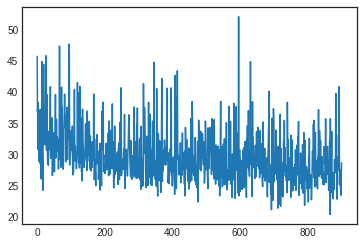

----
 E
Chinhs f athe5 0pooat madbo. Thtoneponcr ahr h ua 
Sclsgicor vea wod losa viild ol d ly vf savi se nt
O R ss  te - Whot 'atok
hi Iuteea bi ta tar 'g niz)cturtp rm son bp eon atr
gas ifr r .n rirve t 
----
iter 900, loss 34.970071


In [25]:
iter = 1000
while iter > 0:
  # Reset
  if pointer + Time_steps >= len(file_1) or iteration == 0:
      g_h_prev = np.zeros((Hidden_Layer_size, 1))
      g_C_prev = np.zeros((Hidden_Layer_size, 1))
      pointer = 0


  inputs = ([char_to_idx[ch] 
              for ch in file_1[pointer: pointer + Time_steps]])
  targets = ([char_to_idx[ch] 
              for ch in file_1[pointer + 1: pointer + Time_steps + 1]])

  loss, g_h_prev, g_C_prev = \
      forward_backward(inputs, targets, g_h_prev, g_C_prev)
  smooth_loss = smooth_loss * 0.999 + loss * 0.001

  # Print every hundred steps
  if iteration % 100 == 0:
      update_status(inputs, g_h_prev, g_C_prev)

  update_paramters()

  plot_iter = np.append(plot_iter, [iteration])
  plot_loss = np.append(plot_loss, [loss])

  pointer += Time_steps
  iteration += 1
  iter = iter -1


Quiz Question 7.

Run the above code for 50000 iterations making sure that you have 100 hidden layers and time_steps is 40. What is the loss value you're seeing?


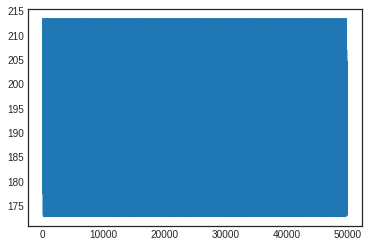

----
 
P7CC) BD-n??F 
z 8L ? C?f ni3z
9- :  CB.-7??
?fzJGDJBnjzBd,BYj
0 BzPdjz4
j YpJ:B?C – j  dBnWB
z

zL c?znJB, dB (,3

(?MBd?Y7 ,yEB–B ,2j–B?  d a0w’dntW?: aJFN7
9 2?a;BCt )P w?? jBGBH

s9x.v
(G MLdIjd? 
----
iter 49900, loss 191.514205


In [27]:
Hidden_Layer_size = 100 #size of the hidden layer
Time_steps = 40 # Number of time steps (length of the sequence) used for training
learning_rate = 1e-1 # Learning Rate
weight_sd = 0.1 #Standard deviation of weights for initialization
z_size = Hidden_Layer_size + X_size #Size of concatenation(H, X) vector

size_a =  Hidden_Layer_size
size_b =  z_size 
size_c =  X_size

class Parameters:
    def __init__(self):
        self.W_f = Param('W_f', np.random.randn(size_a, size_b) * weight_sd + 0.5)
        self.b_f = Param('b_f', np.zeros((size_a, 1)))

        self.W_i = Param('W_i', np.random.randn(size_a, size_b) * weight_sd + 0.5)
        self.b_i = Param('b_i', np.zeros((size_a, 1)))

        self.W_C = Param('W_C', np.random.randn(size_a, size_b) * weight_sd)
        self.b_C = Param('b_C', np.zeros((size_a, 1)))

        self.W_o = Param('W_o', np.random.randn(size_a, size_b) * weight_sd + 0.5)
        self.b_o = Param('b_o', np.zeros((size_a, 1)))

        #For final layer to predict the next character
        self.W_v = Param('W_v', np.random.randn(X_size, size_a) * weight_sd)
        self.b_v = Param('b_v', np.zeros((size_c, 1)))
        
    def all(self):
        return [self.W_f, self.W_i, self.W_C, self.W_o, self.W_v,
               self.b_f, self.b_i, self.b_C, self.b_o, self.b_v]

parameters = Parameters()

def forward(x, h_prev, C_prev, p = parameters):
    assert x.shape == (X_size, 1)
    assert h_prev.shape == (Hidden_Layer_size, 1)
    assert C_prev.shape == (Hidden_Layer_size, 1)
    
    z = np.row_stack((h_prev, x))
    f = sigmoid(np.dot(p.W_f.v, z) + p.b_f.v)
    i = sigmoid(np.dot(p.W_i.v, z) + p.b_i.v)
    C_bar = tanh(np.dot(p.W_i.v, z) + p.b_C.v)

    C = f * C_prev + i * C_bar
    o = sigmoid(np.dot(p.W_o.v, z) + p.b_i.v)
    h = o * tanh(C)
    
    v = np.dot(p.W_v.v, h) + p.b_v.v
    y = np.exp(v) / np.sum(np.exp(v)) #softmax

    return z, f, i, C_bar, C, o, h, v, y

def backward(target, dh_next, dC_next, C_prev,
             z, f, i, C_bar, C, o, h, v, y,
             p = parameters):
    
    assert z.shape == (X_size + Hidden_Layer_size, 1)
    assert v.shape == (X_size, 1)
    assert y.shape == (X_size, 1)
    
    for param in [dh_next, dC_next, C_prev, f, i, C_bar, C, o, h]:
        assert param.shape == (Hidden_Layer_size, 1)
        
    dv = np.copy(y)
    dv[target] -= 1

    p.W_v.d += np.dot(dv, h.T)
    p.b_v.d += dv

    dh = np.dot(p.W_v.v.T, dv)        
    dh += dh_next
    do = dh * tanh(C)
    do = dsigmoid(o) * do
    p.W_o.d += np.dot(do, z.T)
    p.b_o.d += do

    dC = np.copy(dC_next)
    dC += dh * o * dtanh(tanh(C))
    dC_bar = dC * i
    dC_bar = dtanh(C_bar) * dC_bar
    p.W_C.d += np.dot(dC_bar, z.T)
    p.b_C.d += dC_bar

    di = dC * C_bar
    di = dsigmoid(i) * di
    p.W_i.d += np.dot(di, z.T)
    p.b_i.d += di

    df = dC * C_prev
    df = dsigmoid(f) * df
    p.W_f.d += np.dot(df, z.T)
    p.b_f.d += df

    dz = (np.dot(p.W_f.v.T, df)
         + np.dot(p.W_i.v.T, di)
         + np.dot(p.W_C.v.T, dC_bar)
         + np.dot(p.W_o.v.T, do))
    dh_prev = dz[:Hidden_Layer_size, :]
    dC_prev = f * dC
    
    return dh_prev, dC_prev

parameters = Parameters()


# Exponential average of loss
# Initialize to a error of a random model
smooth_loss = -np.log(1.0 / X_size) * Time_steps

iteration, pointer = 0, 0

# For the graph
plot_iter = np.zeros((0))
plot_loss = np.zeros((0))


iter = 50000
while iter > 0:
  # Reset
  if pointer + Time_steps >= len(file_1) or iteration == 0:
      g_h_prev = np.zeros((Hidden_Layer_size, 1))
      g_C_prev = np.zeros((Hidden_Layer_size, 1))
      pointer = 0


  inputs = ([char_to_idx[ch] 
              for ch in file_1[pointer: pointer + Time_steps]])
  targets = ([char_to_idx[ch] 
              for ch in file_1[pointer + 1: pointer + Time_steps + 1]])

  loss, g_h_prev, g_C_prev = \
      forward_backward(inputs, targets, g_h_prev, g_C_prev)
  smooth_loss = smooth_loss * 0.999 + loss * 0.001

  # Print every hundred steps
  if iteration % 100 == 0:
      update_status(inputs, g_h_prev, g_C_prev)

  update_paramters()

  plot_iter = np.append(plot_iter, [iteration])
  plot_loss = np.append(plot_loss, [loss])

  pointer += Time_steps
  iteration += 1
  iter = iter -1